## Assignment

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
#read data
data = pd.read_csv('musk_csv.csv',index_col=0)
data.head()

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,,,,,,,,,,,,,,,,,,,,,
1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1
2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1
3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1
4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1
5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
data.shape   ## shpape of data

(6598, 169)

In [4]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,-96.750000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,-29.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,4.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,231.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


## Data Cleaning
### 1. Check for Duplicates

In [5]:
print('No of duplicates in train: {}'.format(sum(data.drop(['molecule_name','conformation_name'],axis=1).duplicated())))

No of duplicates in train: 17


In [6]:
duplicate = data[data.drop(['molecule_name','conformation_name'],axis=1).duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
duplicate

Duplicate Rows except first occurrence based on all columns are :


,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,,,,,,,,,,,,,,,,,,,,,
1122,NON-MUSK-192,192_1+193,44,-199,-79,-76,242,12,26,-96,...,-73,-128,185,186,177,162,-66,-147,-6,0
1138,NON-MUSK-192,192_1+207,44,-198,-79,-76,242,13,25,-96,...,-71,-126,186,186,177,164,-66,-150,-9,0
1170,NON-MUSK-192,192_1+236,44,-194,-140,-70,238,55,57,-176,...,-299,59,185,181,175,159,-66,-145,-4,0
1171,NON-MUSK-192,192_1+237,44,-194,-140,-70,238,55,57,-176,...,-299,59,185,181,175,159,-66,-145,-4,0
1175,NON-MUSK-192,192_1+240,44,-194,-140,-70,238,55,57,-176,...,-299,59,185,181,175,159,-66,-145,-4,0
1186,NON-MUSK-192,192_1+250,59,88,-136,-68,-117,49,55,-164,...,-307,53,185,188,176,172,-44,-117,118,0
1197,NON-MUSK-192,192_1+260,59,85,-77,-69,-117,49,27,-101,...,-308,52,186,187,177,176,-43,-118,123,0
1209,NON-MUSK-192,192_1+271,44,-194,-140,-70,238,56,57,-177,...,-298,59,185,181,175,162,-66,-147,-7,0
1211,NON-MUSK-192,192_1+273,44,-194,-140,-70,238,56,57,-177,...,-298,59,185,181,175,162,-66,-147,-7,0


### 2. Remove duplicates

In [7]:
final = data.drop(['molecule_name','conformation_name'],axis=1).drop_duplicates()
final.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,,,,,,,,,,,,,,,,,,,,,
1,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
2,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
3,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
5,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [8]:
final.shape

(6581, 167)

### 3. Checking Null values

In [9]:
print('We have {} NaN/Null values in train'.format(final.isnull().values.sum()))

We have 0 NaN/Null values in train


## Check for data imbalance

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

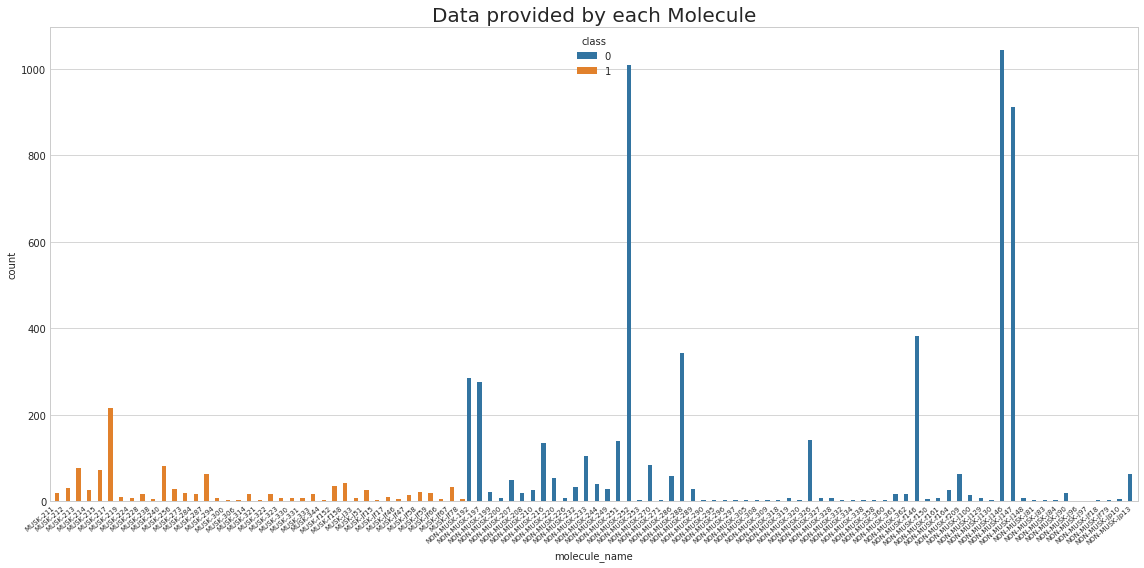

In [11]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each Molecule', fontsize=20)
ax = sns.countplot(x='molecule_name',hue='class', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=7)
plt.tight_layout()
plt.show()


- We have got very low number of Musk and large number of Non- Mask

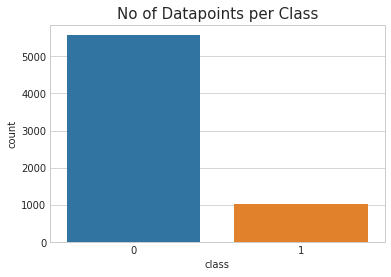

In [12]:
plt.title('No of Datapoints per Class', fontsize=15)
sns.countplot(final['class'])
plt.show()

# Exploratory Data Analysis
"___Without domain knowledge EDA has no meaning, without EDA a problem has no soul.___"

## Apply t-sne on the data 

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# performs t-sne with different perplexity values and their repective plots..
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['s','o'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 6581 samples in 0.172s...
[t-SNE] Computed neighbors for 6581 samples in 9.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6581
[t-SNE] Computed conditional probabilities for sample 2000 / 6581
[t-SNE] Computed conditional probabilities for sample 3000 / 6581
[t-SNE] Computed conditional probabilities for sample 4000 / 6581
[t-SNE] Computed conditional probabilities for sample 5000 / 6581
[t-SNE] Computed conditional probabilities for sample 6000 / 6581
[t-SNE] Computed conditional probabilities for sample 6581 / 6581
[t-SNE] Mean sigma: 2.885469
[t-SNE] Computed conditional probabilities in 0.108s
[t-SNE] Iteration 50: error = 121.3904114, gradient norm = 0.0555859 (50 iterations in 5.487s)
[t-SNE] Iteration 100: error = 102.8482285, gradient norm = 0.0314208 (50 iterations in 3.026s)
[t-SNE] Iteration 150: error = 96.4833298, gradient norm =

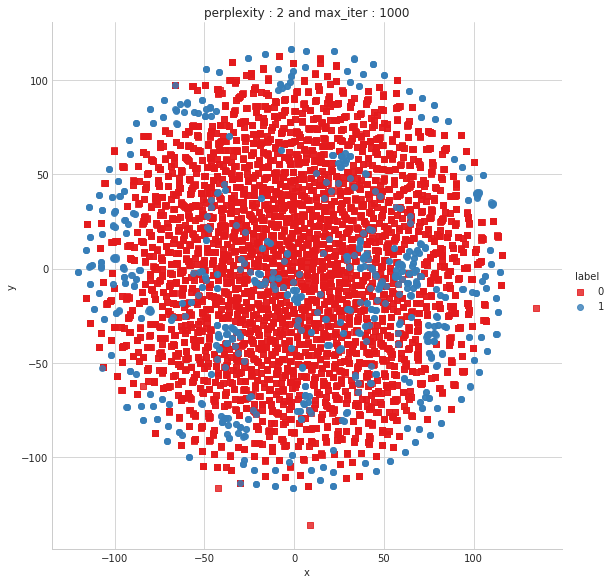

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 6581 samples in 0.074s...
[t-SNE] Computed neighbors for 6581 samples in 9.654s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6581
[t-SNE] Computed conditional probabilities for sample 2000 / 6581
[t-SNE] Computed conditional probabilities for sample 3000 / 6581
[t-SNE] Computed conditional probabilities for sample 4000 / 6581
[t-SNE] Computed conditional probabilities for sample 5000 / 6581
[t-SNE] Computed conditional probabilities for sample 6000 / 6581
[t-SNE] Computed conditional probabilities for sample 6581 / 6581
[t-SNE] Mean sigma: 9.213731
[t-SNE] Computed conditional probabilities in 0.178s
[t-SNE] Iteration 50: error = 110.2126846, gradient norm = 0.0392751 (50 iterations in 5.987s)
[t-SNE] Iteration 100: error = 91.6723328, gradient norm = 0.0188828 (50 iterations in 3.190s)
[t-SNE] Iteration 150: error = 85.8556595, gradient n

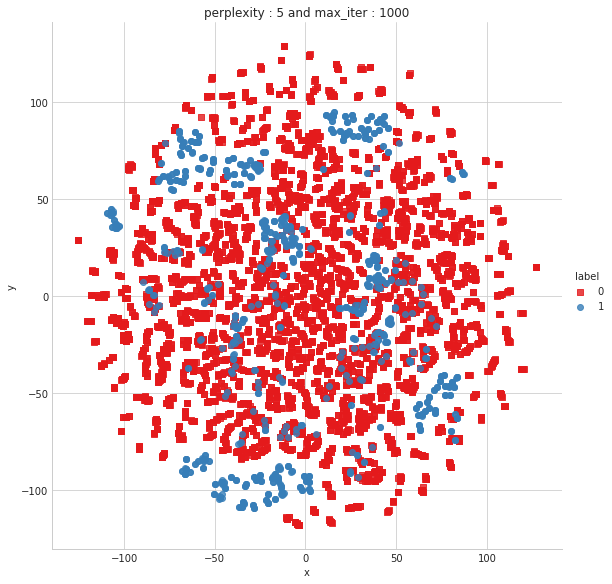

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 6581 samples in 0.070s...
[t-SNE] Computed neighbors for 6581 samples in 10.978s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6581
[t-SNE] Computed conditional probabilities for sample 2000 / 6581
[t-SNE] Computed conditional probabilities for sample 3000 / 6581
[t-SNE] Computed conditional probabilities for sample 4000 / 6581
[t-SNE] Computed conditional probabilities for sample 5000 / 6581
[t-SNE] Computed conditional probabilities for sample 6000 / 6581
[t-SNE] Computed conditional probabilities for sample 6581 / 6581
[t-SNE] Mean sigma: 17.699690
[t-SNE] Computed conditional probabilities in 0.312s
[t-SNE] Iteration 50: error = 101.4378891, gradient norm = 0.0375269 (50 iterations in 6.073s)
[t-SNE] Iteration 100: error = 83.9462357, gradient norm = 0.0129981 (50 iterations in 2.895s)
[t-SNE] Iteration 150: error = 78.8955383, gradien

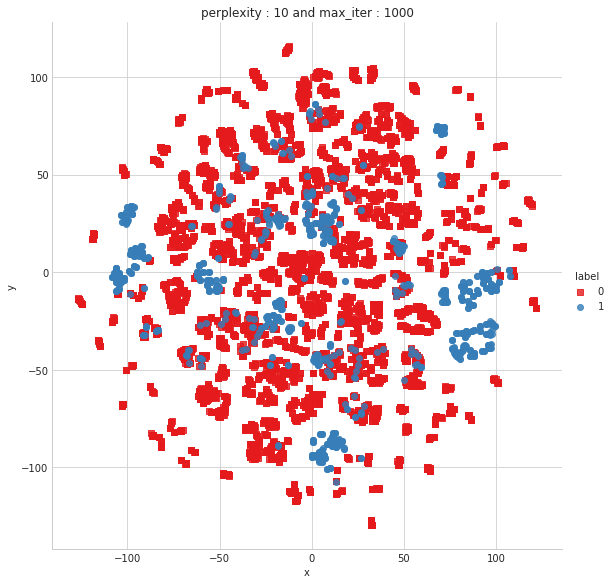

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 6581 samples in 0.089s...
[t-SNE] Computed neighbors for 6581 samples in 11.831s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6581
[t-SNE] Computed conditional probabilities for sample 2000 / 6581
[t-SNE] Computed conditional probabilities for sample 3000 / 6581
[t-SNE] Computed conditional probabilities for sample 4000 / 6581
[t-SNE] Computed conditional probabilities for sample 5000 / 6581
[t-SNE] Computed conditional probabilities for sample 6000 / 6581
[t-SNE] Computed conditional probabilities for sample 6581 / 6581
[t-SNE] Mean sigma: 100.870285
[t-SNE] Computed conditional probabilities in 0.745s
[t-SNE] Iteration 50: error = 93.8912582, gradient norm = 0.0330304 (50 iterations in 5.374s)
[t-SNE] Iteration 100: error = 78.1841660, gradient norm = 0.0086001 (50 iterations in 3.757s)
[t-SNE] Iteration 150: error = 74.3004761, gradien

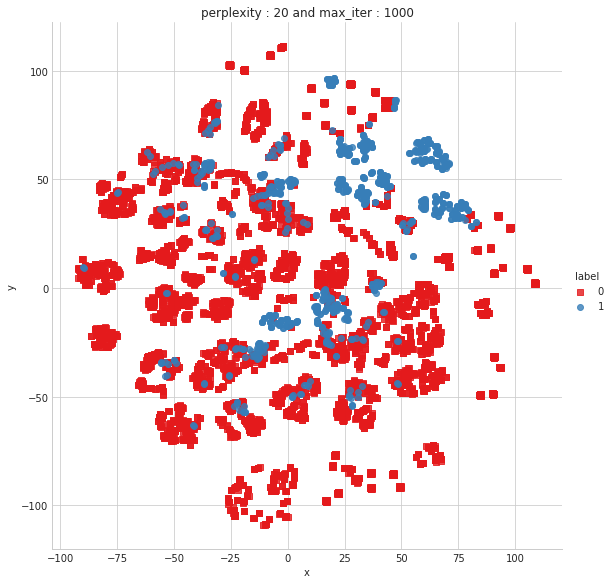

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6581 samples in 0.077s...
[t-SNE] Computed neighbors for 6581 samples in 15.343s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6581
[t-SNE] Computed conditional probabilities for sample 2000 / 6581
[t-SNE] Computed conditional probabilities for sample 3000 / 6581
[t-SNE] Computed conditional probabilities for sample 4000 / 6581
[t-SNE] Computed conditional probabilities for sample 5000 / 6581
[t-SNE] Computed conditional probabilities for sample 6000 / 6581
[t-SNE] Computed conditional probabilities for sample 6581 / 6581
[t-SNE] Mean sigma: 103.020283
[t-SNE] Computed conditional probabilities in 1.493s
[t-SNE] Iteration 50: error = 82.7636642, gradient norm = 0.0420640 (50 iterations in 6.185s)
[t-SNE] Iteration 100: error = 71.8865891, gradient norm = 0.0060045 (50 iterations in 5.089s)
[t-SNE] Iteration 150: error = 69.9942017, gradie

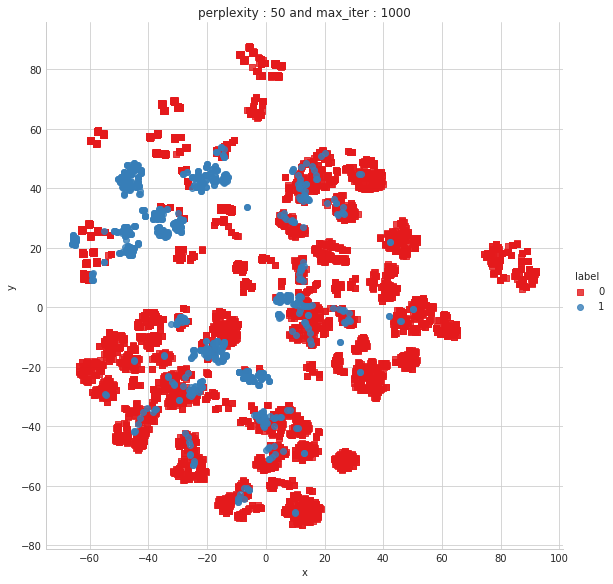

Done


In [15]:
X_pre_tsne = final.drop(['class'], axis=1)
y_pre_tsne = final['class']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

<h3> Density plots of features </h3>
Let's show now the density plot of variables in dataset.

We represent with different colors the distribution for values with class value 0 and 1

<Figure size 432x288 with 0 Axes>

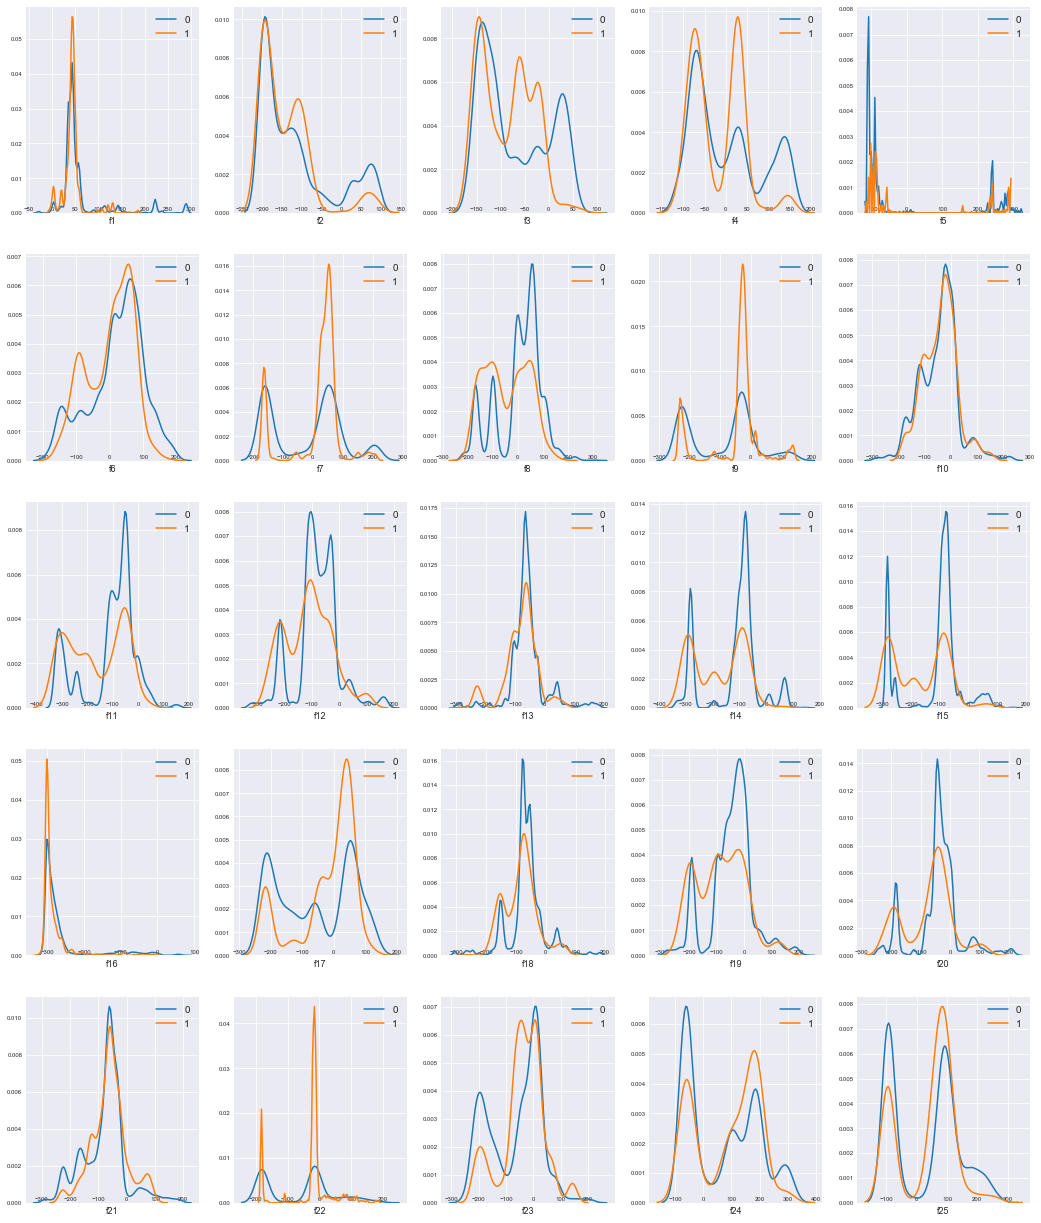

In [19]:
t0 = final.loc[final['class'] == 0]
t1 = final.loc[final['class'] == 1]
features = final.columns.values[0:25]

i = 0
sns.set_style('darkgrid')
plt.figure()
fig, ax = plt.subplots(10,10,figsize=(18,22))

for feature in features:
    i += 1
    plt.subplot(5,5,i)
    sns.distplot(t0[feature], hist=False,label='0')
    sns.distplot(t1[feature], hist=False,label='1')
    plt.xlabel(feature, fontsize=9)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
    plt.tick_params(axis='y', which='major', labelsize=6)
plt.show()

- We can observe that there is a considerable number of features with different distribution for the two class values.
- Also some features shows a distribution that resambles to a bivariate distribution.

# Splitting data into train and test(80:20)

In [24]:
#split data into train, cross validate and test 
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
X = final.drop(['class'],axis=1)
Y = final['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, stratify=Y)

In [25]:
print("Number of data points in train data :",x_train.shape)
print("Number of data points in test data :",x_test.shape)

Number of data points in train data : (5264, 166)
Number of data points in test data : (1317, 166)


In [28]:
print("Distribution of output variable in train data")
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*80)
print("Distribution of output variable in test data")
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

Distribution of output variable in train data
Class 0:  0.8455547112462006 Class 1:  0.1544452887537994
--------------------------------------------------------------------------------
Distribution of output variable in test data
Class 0:  0.8451025056947609 Class 1:  0.1548974943052392


# Data Preparation

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Modelling 

In [35]:
## import library
import keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *

In [72]:
model =Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               21376     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 31,745
Trainable params: 31,745
Non-trainable params: 0
_________________________________________________________________


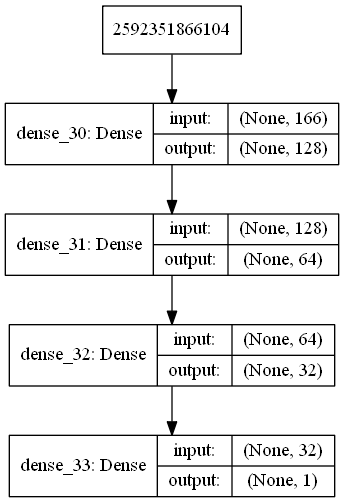

In [74]:
import pydot
from keras.utils import plot_model
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [75]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Train on 5264 samples, validate on 1317 samples
Epoch 1/10
5264/5264 [==============================] - 1s 273us/step - loss: 0.2246 - acc: 0.9105 - val_loss: 0.1323 - val_acc: 0.9552
Epoch 2/10
5264/5264 [==============================] - 0s 61us/step - loss: 0.1015 - acc: 0.9643 - val_loss: 0.0834 - val_acc: 0.9643
Epoch 3/10
5264/5264 [==============================] - 0s 59us/step - loss: 0.0689 - acc: 0.9744 - val_loss: 0.0644 - val_acc: 0.9749
Epoch 4/10
5264/5264 [==============================] - 0s 60us/step - loss: 0.0427 - acc: 0.9816 - val_loss: 0.0434 - val_acc: 0.9841
Epoch 5/10
5264/5264 [==============================] - 0s 60us/step - loss: 0.0305 - acc: 0.9884 - val_loss: 0.0392 - val_acc: 0.9818
Epoch 6/10
5264/5264 [==============================] - 0s 60us/step - loss: 0.0214 - acc: 0.9916 - val_loss: 0.0273 - val_acc: 0.9909
Epoch 7/10
5264/5264 [==============================] - 0s 58us/step - loss: 0.0148 - acc: 0.9953 - val_loss: 0.0203 - val_acc: 0.9924
Epoch 

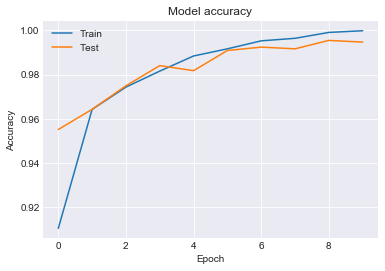

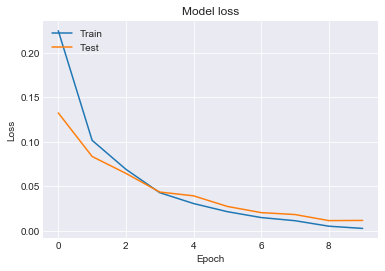

In [76]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Predict on test data

In [78]:
y_pred = model.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

Macro f1 score for data : 0.9897044223297555
Micro f1 scoore for data: 0.9946848899012908
Hamming loss for data: 0.005315110098709187
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1113
           1       1.00      0.97      0.98       204

    accuracy                           0.99      1317
   macro avg       1.00      0.98      0.99      1317
weighted avg       0.99      0.99      0.99      1317



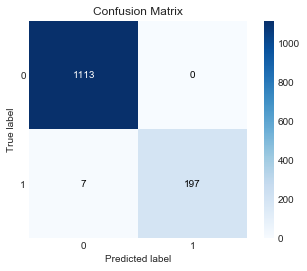

In [81]:
from sklearn import metrics
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test,y_pred)
print("Macro f1 score for data :",metrics.f1_score(y_test, y_pred, average = 'macro'))
print("Micro f1 scoore for data:",metrics.f1_score(y_test, y_pred, average = 'micro'))
print("Hamming loss for data:",metrics.hamming_loss(y_test,y_pred))
print("Precision recall report for data:\n",metrics.classification_report(y_test, y_pred))

## Save Model 

In [82]:
model.save('model.h5')
model.save_weights('model_weights.h5')